In [63]:
import osmnx as ox
import pandas as pd
import geocoder
from geopy.geocoders import Nominatim
import folium
from folium.plugins import MarkerCluster
import streamlit as st
from streamlit_folium import folium_static
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [25]:
price_today= pd.read_excel('price_today.xlsx')
df_acum= pd.read_excel('df_definitivo.xlsx')

In [26]:
geolocator = Nominatim(user_agent="My-App")
location = geolocator.geocode("Plaza Maestro Tarrega, 8, Alcobendas") 

print((location.latitude, location.longitude))

(40.5492094, -3.6446537)


In [4]:
type(location)

geopy.location.Location

In [47]:
diccionario={'REPSOL': 'REPSOL.png', 'CEPSA': 'CEPSA.png'}
diccionario


{'REPSOL': 'REPSOL.png', 'CEPSA': 'CEPSA.png'}

In [27]:
price_today = price_today.sort_values('Distance')
price_head=price_today.head(3)
price_head

,Provincia,Municipio,Localidad,Código postal,Dirección,Longitud,Latitud,Precio gasolina 95 E5,Precio gasolina 95 E5 Premium,Precio gasolina 98 E5,Precio gasóleo A,Precio gasóleo Premium,Rótulo,Horario,Fecha de extracción,Latitud_partida,Longitud_partida,mercator_start,mercator_finish,Distance
6386,MADRID,Alcobendas,ALCOBENDAS,28100,"AVENIDA MARQUES DE LA VALDAVIA, 132",-3.651861,40.546556,"1,779",No disponible,No disponible,"1,799",No disponible,PETROPRIX,L-D: 24H,23-04-2022,40.549209,-3.644654,POINT (4513917.342477823 -405994.8883876073),POINT (4513621.967340952 -406798.8305516534),856.486704
6383,MADRID,Alcobendas,ALCOBENDAS,28100,"CALLE MARQUES DE LA VALDAVIA (DEL), 138",-3.653944,40.546944,"1,879",No disponible,"2,021","1,929","2,019",BP VALDAVIA,L-D: 24H,23-04-2022,40.549209,-3.644654,POINT (4513917.342477823 -405994.8883876073),POINT (4513665.159303379 -407031.1811113249),1066.535964
6394,MADRID,Alcobendas,ALCOBENDAS,28100,"CL AVENIDA DE ESPAÑA, S.N.",-3.634639,40.546167,"1,869",No disponible,"2,019","1,929","2,019",REPSOL,L-D: 24H,23-04-2022,40.549209,-3.644654,POINT (4513917.342477823 -405994.8883876073),POINT (4513578.664059033 -404877.8039682711),1167.296308


In [48]:
mapa_loop = folium.Map(location=[40.546376,-3.638541], zoom_start=15)

#marker_cluster = MarkerCluster().add_to(mapa_loop)

def ubi_gasolinera(price_head):
    for i in range(0,len(price_head)):
        html=f"""
            <h> {price_head.iloc[i]['Rótulo']}</h>
            <p><b>Prices:</b></p>
                <li> Gasolina 95:{price_head.iloc[i]['Precio gasolina 95 E5']} €</li>
                <li> Diésel:{price_head.iloc[i]['Precio gasóleo A']} €</li>
            <p><b>Dirección:</b></p>
            <p>{price_head.iloc[i]['Dirección']}</p>
            </ul> 
            </p>
            <p>And that's a <a href="https://www.python-graph-gallery.com">link</a></p>
            """
        
        
        iframe = folium.IFrame(html=html, width=200, height=200)
        popup = folium.Popup(iframe, max_width=2650)
        
        folium.Marker(
                location=[price_head.iloc[i]['Latitud'],price_head.iloc[i]['Longitud']],
                popup=popup,
                icon=folium.Icon(color="green",  icon="ok-sign"),
        ).add_to(mapa_loop)
        
    return mapa_loop

def ubi_actual(price_head):
    html=f"""
        <h><b> Actualmente te encuentras aquí </b></h>
        """
    iframe = folium.IFrame(html=html, width=150, height=60)
    popup = folium.Popup(iframe, max_width=2650)
    folium.Marker(
        location=[price_head.iloc[0]['Latitud_partida'],price_head.iloc[0]['Longitud_partida']],
        popup=popup,
        icon=folium.Icon(color="lightgray",  icon="home"),
).add_to(mapa_loop)  
    return mapa_loop
    
ubi_gasolinera(price_head)
ubi_actual(price_head)

2022-04-23 19:19:34.832 Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-04-23 19:19:34.834 Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-04-23 19:19:34.837 Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-04-23 19:19:34.840 Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


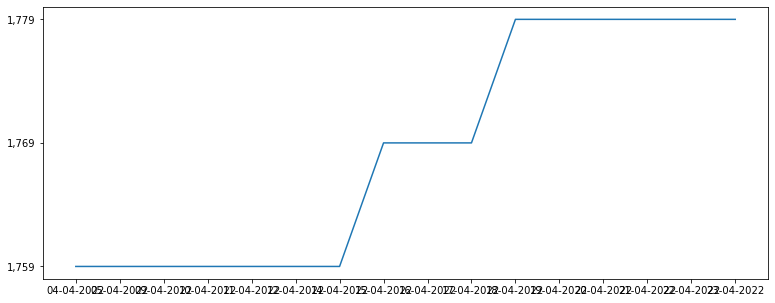

In [72]:
df_grafico=[]
direccion_gasolineras=list(price_head['Dirección'].unique())
for i in direccion_gasolineras:
    df_grafico.append(df_acum[df_acum.Dirección.isin([i])])
df_grafico[0]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13,5))
x= df_grafico[0]['Fecha de extracción']
y= df_grafico[0] ['Precio gasolina 95 E5'].sort_values()

ax.plot(x,y)
plt.show()
fig.savefig("my_plot_name.png")

In [57]:
st.title('Map of Gas')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [58]:
folium_static(mapa_loop)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [56]:
mapa_loop.py

SyntaxError: invalid syntax (494728032.py, line 1)